In [1]:
# Imports

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

import nltk
from nltk import punkt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors

import webbrowser

import difflib

# NLP

In [2]:
with open('./Pickles/df_sneakers.pickle', 'rb') as f:
    df_sneakers = pickle.load(f)

In [3]:
df_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,Adidas Originals’ NMD Human Race shoes live up...,4,[The Pharrell Williams x Adidas Human Race NMD...,8,[The Pharrell Williams x Adidas Human Race NMD...
1,Adidas Stan Smith,93,After Adidas brought back the Stan Smith about...,4,[Some of the sneakers’ diehard fans remarked t...,11,"[The main model in the Stan Smith collection, ..."
2,Adidas Continental 80,92,Adidas sneakers are known for taking inspirati...,3,"[The Adidas Continental 80 has a narrow fit, s...",10,[The majority of testers admire the Adidas Con...
3,Adidas POD-S3.1,92,The Adidas POD-S3.1 is a new model added to th...,2,[One person thought that the stitching and glu...,9,[Almost all the buyers of the Adidas POD-S3.1 ...
4,Adidas Superstar,94,The Adidas Superstar is absolutely an iconic c...,3,[Loyal Superstars wearers are disappointed tha...,9,[The majority of the reviewers like that the A...
5,Adidas Grand Court,92,The Three Stripes tweaked its tennis classics ...,2,"[This sneaker is quite narrow, according to a ...",8,[Most of the reviewers are attracted to the Ad...
6,Adidas I-5923,91,"Initially introduced as the Iniki Runner, the ...",5,"[Several, including those with wide feet, note...",9,[Many like that the Adidas I-5923 sneakers com...
7,Adidas Sobakov,92,After the release of the Adidas Kamanda with a...,5,[The upper is denser than Primeknit and isn’t ...,11,[Many hailed the design of the Adidas Sobakov ...
8,Adidas Swift Run,93,"Another low-top shoe from Adidas, the Swift Ru...",3,[Several of the users complain about the shoe ...,10,[Most of the comments state that the Adidas Sw...
9,Adidas NMD_R1 Primeknit,92,Even if the Adidas NMD_R1 Primeknit is priced ...,2,"[While they are happy with their purchase, qui...",9,[A lot of wearers love the upper of the Adidas...


In [4]:
nlp_sneakers = df_sneakers.copy()

In [5]:
# Converting lists into strings

nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(', '.join)
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(', '.join)

In [6]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,Adidas Originals’ NMD Human Race shoes live up...,4,The Pharrell Williams x Adidas Human Race NMD ...,8,The Pharrell Williams x Adidas Human Race NMD ...
1,Adidas Stan Smith,93,After Adidas brought back the Stan Smith about...,4,Some of the sneakers’ diehard fans remarked th...,11,"The main model in the Stan Smith collection, t..."
2,Adidas Continental 80,92,Adidas sneakers are known for taking inspirati...,3,"The Adidas Continental 80 has a narrow fit, se...",10,The majority of testers admire the Adidas Cont...
3,Adidas POD-S3.1,92,The Adidas POD-S3.1 is a new model added to th...,2,One person thought that the stitching and glui...,9,Almost all the buyers of the Adidas POD-S3.1 s...
4,Adidas Superstar,94,The Adidas Superstar is absolutely an iconic c...,3,Loyal Superstars wearers are disappointed that...,9,The majority of the reviewers like that the Ad...
5,Adidas Grand Court,92,The Three Stripes tweaked its tennis classics ...,2,"This sneaker is quite narrow, according to a c...",8,Most of the reviewers are attracted to the Adi...
6,Adidas I-5923,91,"Initially introduced as the Iniki Runner, the ...",5,"Several, including those with wide feet, note ...",9,Many like that the Adidas I-5923 sneakers come...
7,Adidas Sobakov,92,After the release of the Adidas Kamanda with a...,5,The upper is denser than Primeknit and isn’t t...,11,Many hailed the design of the Adidas Sobakov a...
8,Adidas Swift Run,93,"Another low-top shoe from Adidas, the Swift Ru...",3,Several of the users complain about the shoe h...,10,Most of the comments state that the Adidas Swi...
9,Adidas NMD_R1 Primeknit,92,Even if the Adidas NMD_R1 Primeknit is priced ...,2,"While they are happy with their purchase, quit...",9,A lot of wearers love the upper of the Adidas ...


In [7]:
# analyzer = SentimentIntensityAnalyzer()

In [8]:
# def text_analyzer(series, sentiment=None):
#     score_list = []
#     for text in series:
#         vs = analyzer.polarity_scores(text)
#         if sentiment == 'neg':
#             score_list.append(vs['neg'])
#         elif sentiment == 'neu':
#             score_list.append(vs['neu'])
#         elif sentiment == 'pos':
#             score_list.append(vs['pos'])
#         elif sentiment == 'compound':
#             score_list.append(vs['compound'])
#         else:
#             score_list.append(vs)
#     return score_list

In [9]:
# New columns for the Vader scores

# nlp_sneakers['bottom_line_score'] = text_analyzer(nlp_sneakers['bottom_line'], sentiment='compound')
# nlp_sneakers['con_text_score'] = text_analyzer(nlp_sneakers['con_text'], sentiment='neg')
# nlp_sneakers['pro_text_score'] = text_analyzer(nlp_sneakers['pro_text'], sentiment='pos')

In [10]:
# nlp_sneakers

In [11]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [12]:
# Removing punctuations

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(remove_punctuations)
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(remove_punctuations)
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(remove_punctuations)

In [13]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,Adidas Originals’ NMD Human Race shoes live up...,4,The Pharrell Williams x Adidas Human Race NMD ...,8,The Pharrell Williams x Adidas Human Race NMD ...
1,Adidas Stan Smith,93,After Adidas brought back the Stan Smith about...,4,Some of the sneakers’ diehard fans remarked th...,11,The main model in the Stan Smith collection t...
2,Adidas Continental 80,92,Adidas sneakers are known for taking inspirati...,3,The Adidas Continental 80 has a narrow fit se...,10,The majority of testers admire the Adidas Cont...
3,Adidas POD-S3.1,92,The Adidas POD S3 1 is a new model added to th...,2,One person thought that the stitching and glui...,9,Almost all the buyers of the Adidas POD S3 1 s...
4,Adidas Superstar,94,The Adidas Superstar is absolutely an iconic c...,3,Loyal Superstars wearers are disappointed that...,9,The majority of the reviewers like that the Ad...
5,Adidas Grand Court,92,The Three Stripes tweaked its tennis classics ...,2,This sneaker is quite narrow according to a c...,8,Most of the reviewers are attracted to the Adi...
6,Adidas I-5923,91,Initially introduced as the Iniki Runner the ...,5,Several including those with wide feet note ...,9,Many like that the Adidas I 5923 sneakers come...
7,Adidas Sobakov,92,After the release of the Adidas Kamanda with a...,5,The upper is denser than Primeknit and isn’t t...,11,Many hailed the design of the Adidas Sobakov a...
8,Adidas Swift Run,93,Another low top shoe from Adidas the Swift Ru...,3,Several of the users complain about the shoe h...,10,Most of the comments state that the Adidas Swi...
9,Adidas NMD_R1 Primeknit,92,Even if the Adidas NMD R1 Primeknit is priced ...,2,While they are happy with their purchase quit...,9,A lot of wearers love the upper of the Adidas ...


In [14]:
# Lowercasing

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].str.lower()
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].str.lower()
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].str.lower()

In [15]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,adidas originals’ nmd human race shoes live up...,4,the pharrell williams x adidas human race nmd ...,8,the pharrell williams x adidas human race nmd ...
1,Adidas Stan Smith,93,after adidas brought back the stan smith about...,4,some of the sneakers’ diehard fans remarked th...,11,the main model in the stan smith collection t...
2,Adidas Continental 80,92,adidas sneakers are known for taking inspirati...,3,the adidas continental 80 has a narrow fit se...,10,the majority of testers admire the adidas cont...
3,Adidas POD-S3.1,92,the adidas pod s3 1 is a new model added to th...,2,one person thought that the stitching and glui...,9,almost all the buyers of the adidas pod s3 1 s...
4,Adidas Superstar,94,the adidas superstar is absolutely an iconic c...,3,loyal superstars wearers are disappointed that...,9,the majority of the reviewers like that the ad...
5,Adidas Grand Court,92,the three stripes tweaked its tennis classics ...,2,this sneaker is quite narrow according to a c...,8,most of the reviewers are attracted to the adi...
6,Adidas I-5923,91,initially introduced as the iniki runner the ...,5,several including those with wide feet note ...,9,many like that the adidas i 5923 sneakers come...
7,Adidas Sobakov,92,after the release of the adidas kamanda with a...,5,the upper is denser than primeknit and isn’t t...,11,many hailed the design of the adidas sobakov a...
8,Adidas Swift Run,93,another low top shoe from adidas the swift ru...,3,several of the users complain about the shoe h...,10,most of the comments state that the adidas swi...
9,Adidas NMD_R1 Primeknit,92,even if the adidas nmd r1 primeknit is priced ...,2,while they are happy with their purchase quit...,9,a lot of wearers love the upper of the adidas ...


In [16]:
# Removing numbers

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].str.replace('\d+', ' ')
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].str.replace('\d+', ' ')
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].str.replace('\d+', ' ')

In [17]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,adidas originals’ nmd human race shoes live up...,4,the pharrell williams x adidas human race nmd ...,8,the pharrell williams x adidas human race nmd ...
1,Adidas Stan Smith,93,after adidas brought back the stan smith about...,4,some of the sneakers’ diehard fans remarked th...,11,the main model in the stan smith collection t...
2,Adidas Continental 80,92,adidas sneakers are known for taking inspirati...,3,the adidas continental has a narrow fit sev...,10,the majority of testers admire the adidas cont...
3,Adidas POD-S3.1,92,the adidas pod s is a new model added to th...,2,one person thought that the stitching and glui...,9,almost all the buyers of the adidas pod s s...
4,Adidas Superstar,94,the adidas superstar is absolutely an iconic c...,3,loyal superstars wearers are disappointed that...,9,the majority of the reviewers like that the ad...
5,Adidas Grand Court,92,the three stripes tweaked its tennis classics ...,2,this sneaker is quite narrow according to a c...,8,most of the reviewers are attracted to the adi...
6,Adidas I-5923,91,initially introduced as the iniki runner the ...,5,several including those with wide feet note ...,9,many like that the adidas i sneakers come in...
7,Adidas Sobakov,92,after the release of the adidas kamanda with a...,5,the upper is denser than primeknit and isn’t t...,11,many hailed the design of the adidas sobakov a...
8,Adidas Swift Run,93,another low top shoe from adidas the swift ru...,3,several of the users complain about the shoe h...,10,most of the comments state that the adidas swi...
9,Adidas NMD_R1 Primeknit,92,even if the adidas nmd r primeknit is priced ...,2,while they are happy with their purchase quit...,9,a lot of wearers love the upper of the adidas ...


In [18]:
# Removing stop words

stop = set(stopwords.words('english'))
stop.add('adidas')
stop.add('nike')
stop.add('superstar')
stop.add('stan')
stop.add('smith')
stop.add('air')
stop.add('max')
stop.add('force')
stop.add('one')
stop.add('make')
stop.add('say')
stop.add('sneaker')
stop.add('sneakers')
stop.add('shoe')
stop.add('shoes')
stop.add('pair')
stop.add('reviewer')
stop.add('reviewers')
stop.add('user')
stop.add('users')
stop.add('wearer')
stop.add('wearers')
stop.add('buyer')
stop.add('buyers')
stop.add('purchaser')
stop.add('purchasers')
stop.add('number')
stop.add('numbers')
stop.add('many')
stop.add('several')
stop.add('say')
stop.add('make')
stop.add('sb')

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [19]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,originals’ nmd human race live brand’s traditi...,4,pharrell williams x human race nmd runs big ac...,8,pharrell williams x human race nmd looks got t...
1,Adidas Stan Smith,93,brought back years ago seen renaissance match ...,4,sneakers’ diehard fans remarked leather upper ...,11,main model collection comfortable reported lar...
2,Adidas Continental 80,92,known taking inspiration heritage styles case ...,3,continental narrow fit testers detected handfu...,10,majority testers admire continental ’s unique ...
3,Adidas POD-S3.1,92,pod new model added line making waves market s...,2,person thought stitching gluing knit onto sole...,9,almost pod said would recommend others nice mo...
4,Adidas Superstar,94,absolutely iconic classic loved fans casual co...,3,loyal superstars disappointed quality seems de...,9,majority like iconic classic never goes style ...
5,Adidas Grand Court,92,three stripes tweaked tennis classics fresher ...,2,quite narrow according couple feel enough support,8,attracted grand court’s simplicity mention hee...
6,Adidas I-5923,91,initially introduced iniki runner low top unkn...,5,including wide feet note fit extensive usual s...,9,like come variety fresh colorways iterations t...
7,Adidas Sobakov,92,release kamanda deliberately misshapen midsole...,5,upper denser primeknit isn’t stretchy knitted ...,11,hailed design sobakov innovative unique knitte...
8,Adidas Swift Run,93,another low top swift run offers great comfort...,3,complain poor quality couple point knit upper ...,10,comments state swift run comfortable good ligh...
9,Adidas NMD_R1 Primeknit,92,even nmd r primeknit priced average rate three...,2,happy purchase quite still think bit expensive...,9,lot love upper nmd r primeknit hugs feet like ...


In [20]:
# Lemmatizing verbs

lemmatizer = WordNetLemmatizer()

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()]))
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()]))
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos='v') for word in x.split()]))

In [21]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,originals’ nmd human race live brand’s traditi...,4,pharrell williams x human race nmd run big acc...,8,pharrell williams x human race nmd look get th...
1,Adidas Stan Smith,93,bring back year ago see renaissance match hist...,4,sneakers’ diehard fan remark leather upper low...,11,main model collection comfortable report large...
2,Adidas Continental 80,92,know take inspiration heritage style case cont...,3,continental narrow fit tester detect handful w...,10,majority tester admire continental ’s unique s...
3,Adidas POD-S3.1,92,pod new model add line make wave market since ...,2,person think stitch glue knit onto sole do hap...,9,almost pod say would recommend others nice mod...
4,Adidas Superstar,94,absolutely iconic classic love fan casual cons...,3,loyal superstar disappoint quality seem declin...,9,majority like iconic classic never go style gr...
5,Adidas Grand Court,92,three stripe tweak tennis classic fresher clea...,2,quite narrow accord couple feel enough support,8,attract grand court’s simplicity mention heel ...
6,Adidas I-5923,91,initially introduce iniki runner low top unkno...,5,include wide foot note fit extensive usual sho...,9,like come variety fresh colorways iteration th...
7,Adidas Sobakov,92,release kamanda deliberately misshapen midsole...,5,upper denser primeknit isn’t stretchy knit cov...,11,hail design sobakov innovative unique knit com...
8,Adidas Swift Run,93,another low top swift run offer great comfort ...,3,complain poor quality couple point knit upper ...,10,comment state swift run comfortable good light...
9,Adidas NMD_R1 Primeknit,92,even nmd r primeknit price average rate three ...,2,happy purchase quite still think bite expensiv...,9,lot love upper nmd r primeknit hug foot like s...


In [22]:
# Tokenizing

tokenizer = word_tokenize

nlp_sneakers['bottom_line'] = nlp_sneakers['bottom_line'].apply(tokenizer)
nlp_sneakers['con_text'] = nlp_sneakers['con_text'].apply(tokenizer)
nlp_sneakers['pro_text'] = nlp_sneakers['pro_text'].apply(tokenizer)

In [23]:
nlp_sneakers

,name,score,bottom_line,con_nums,con_text,pro_nums,pro_text
0,Pharrell Williams x Adidas Human Race NMD,93,"[originals, ’, nmd, human, race, live, brand, ...",4,"[pharrell, williams, x, human, race, nmd, run,...",8,"[pharrell, williams, x, human, race, nmd, look..."
1,Adidas Stan Smith,93,"[bring, back, year, ago, see, renaissance, mat...",4,"[sneakers, ’, diehard, fan, remark, leather, u...",11,"[main, model, collection, comfortable, report,..."
2,Adidas Continental 80,92,"[know, take, inspiration, heritage, style, cas...",3,"[continental, narrow, fit, tester, detect, han...",10,"[majority, tester, admire, continental, ’, s, ..."
3,Adidas POD-S3.1,92,"[pod, new, model, add, line, make, wave, marke...",2,"[person, think, stitch, glue, knit, onto, sole...",9,"[almost, pod, say, would, recommend, others, n..."
4,Adidas Superstar,94,"[absolutely, iconic, classic, love, fan, casua...",3,"[loyal, superstar, disappoint, quality, seem, ...",9,"[majority, like, iconic, classic, never, go, s..."
5,Adidas Grand Court,92,"[three, stripe, tweak, tennis, classic, freshe...",2,"[quite, narrow, accord, couple, feel, enough, ...",8,"[attract, grand, court, ’, s, simplicity, ment..."
6,Adidas I-5923,91,"[initially, introduce, iniki, runner, low, top...",5,"[include, wide, foot, note, fit, extensive, us...",9,"[like, come, variety, fresh, colorways, iterat..."
7,Adidas Sobakov,92,"[release, kamanda, deliberately, misshapen, mi...",5,"[upper, denser, primeknit, isn, ’, t, stretchy...",11,"[hail, design, sobakov, innovative, unique, kn..."
8,Adidas Swift Run,93,"[another, low, top, swift, run, offer, great, ...",3,"[complain, poor, quality, couple, point, knit,...",10,"[comment, state, swift, run, comfortable, good..."
9,Adidas NMD_R1 Primeknit,92,"[even, nmd, r, primeknit, price, average, rate...",2,"[happy, purchase, quite, still, think, bite, e...",9,"[lot, love, upper, nmd, r, primeknit, hug, foo..."


In [24]:
# pwd

In [25]:
# with open('/Users/flatironschool/Flatiron_Projects/Adike/Pickles/nlp_sneakers.pickle', 'wb') as f:
#         pickle.dump(nlp_sneakers, f, pickle.HIGHEST_PROTOCOL)

# LDA

In [26]:
df_bottom_line = pd.DataFrame(nlp_sneakers['bottom_line'])

In [27]:
df_con_text = pd.DataFrame(nlp_sneakers['con_text'])

In [28]:
df_pro_text = pd.DataFrame(nlp_sneakers['pro_text'])

In [29]:
df_name_score = nlp_sneakers[['name', 'score']].copy()

In [30]:
def get_words(df):
    all_words = []
    for i in range(0, 844):
        for s in df.loc[i][0]:
            if s == 're':
                df.loc[i][0].remove(s)
            df.loc[i][0] = [s for s in df.loc[i][0] if len(s) > 1]
        all_words.append(df.loc[i][0])
    return all_words

In [31]:
list_bottom_line = get_words(df_bottom_line)

In [32]:
list_con_text = get_words(df_con_text)

In [33]:
list_pro_text = get_words(df_pro_text)

In [34]:
dictionary_b = Dictionary(list_bottom_line)

In [35]:
dictionary_c = Dictionary(list_con_text)

In [36]:
dictionary_p = Dictionary(list_pro_text)

In [37]:
bow_corpus_b = [dictionary_b.doc2bow(doc) for doc in list_bottom_line]

In [38]:
bow_corpus_c = [dictionary_c.doc2bow(doc) for doc in list_con_text]

In [39]:
bow_corpus_p = [dictionary_p.doc2bow(doc) for doc in list_pro_text]

In [40]:
lda_b = LdaMulticore(bow_corpus_b, id2word=dictionary_b, num_topics=15, random_state = 22, passes=10, per_word_topics=True)

In [41]:
lda_b.print_topics()

[(0,
  '0.014*"design" + 0.014*"comfort" + 0.011*"kick" + 0.010*"style" + 0.009*"primeknit" + 0.009*"upper" + 0.008*"feature" + 0.007*"look" + 0.007*"price" + 0.006*"support"'),
 (1,
  '0.015*"comfort" + 0.011*"also" + 0.011*"style" + 0.009*"design" + 0.009*"silhouette" + 0.009*"cloudfoam" + 0.009*"top" + 0.007*"price" + 0.007*"look" + 0.006*"well"'),
 (2,
  '0.014*"look" + 0.013*"upper" + 0.012*"comfort" + 0.012*"style" + 0.011*"leather" + 0.009*"low" + 0.009*"premium" + 0.008*"make" + 0.008*"price" + 0.008*"silhouette"'),
 (3,
  '0.016*"comfort" + 0.013*"style" + 0.010*"look" + 0.010*"silhouette" + 0.009*"classic" + 0.009*"upper" + 0.009*"kick" + 0.008*"price" + 0.008*"material" + 0.008*"modern"'),
 (4,
  '0.014*"price" + 0.009*"premium" + 0.009*"comfortable" + 0.009*"look" + 0.009*"also" + 0.008*"design" + 0.008*"feature" + 0.008*"comfort" + 0.008*"silhouette" + 0.008*"top"'),
 (5,
  '0.012*"run" + 0.011*"look" + 0.011*"fit" + 0.010*"feel" + 0.010*"comfort" + 0.009*"price" + 0.009*"

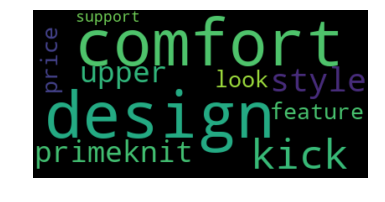

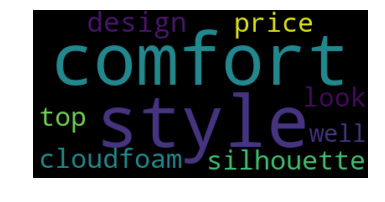

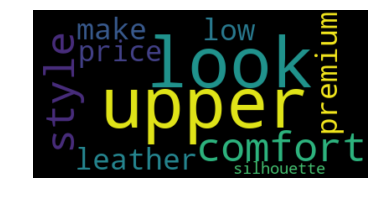

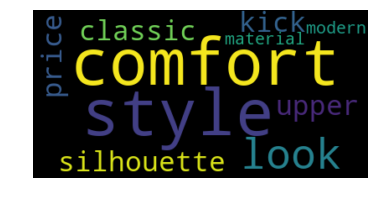

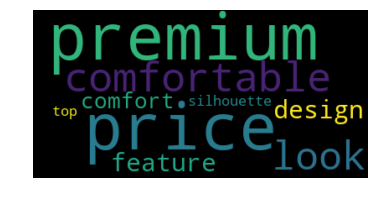

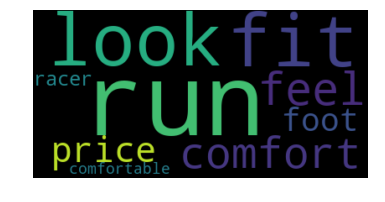

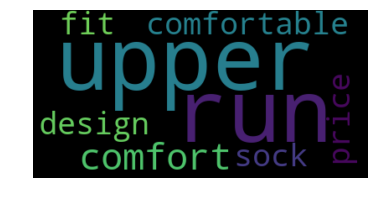

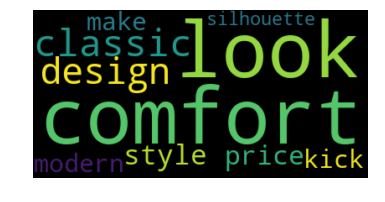

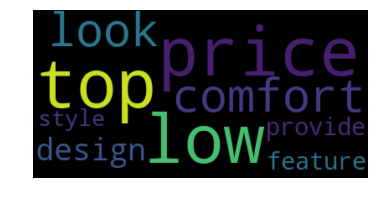

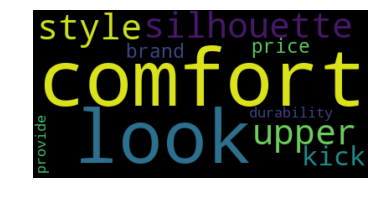

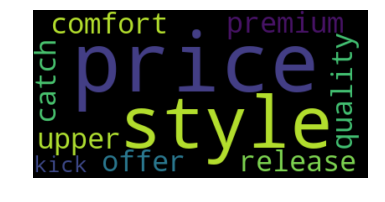

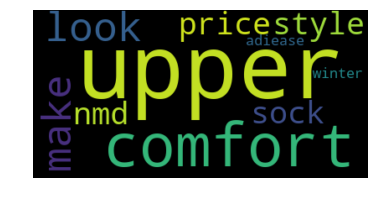

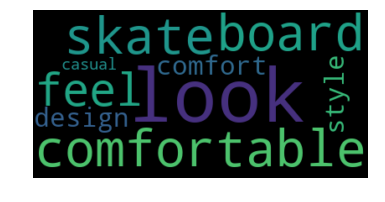

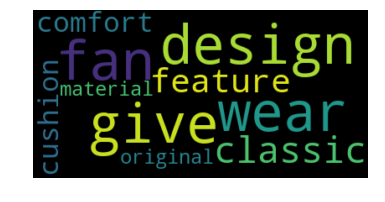

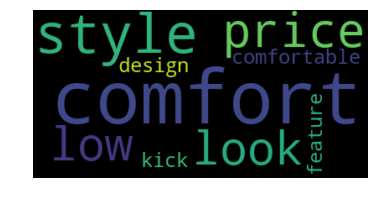

In [42]:
for i in range(15):
    wordcloud = WordCloud().generate(lda_b.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [43]:
lda_c = LdaMulticore(bow_corpus_c, id2word=dictionary_c, num_topics=15, random_state = 22, passes=10, per_word_topics=True)

In [44]:
lda_c.print_topics()

[(0,
  '0.019*"complain" + 0.016*"upper" + 0.013*"price" + 0.013*"support" + 0.013*"slightly" + 0.012*"couple" + 0.012*"foot" + 0.012*"material" + 0.010*"narrow" + 0.010*"expensive"'),
 (1,
  '0.025*"look" + 0.015*"say" + 0.014*"couple" + 0.011*"person" + 0.011*"express" + 0.011*"hard" + 0.010*"upper" + 0.010*"color" + 0.009*"fit" + 0.009*"make"'),
 (2,
  '0.020*"report" + 0.019*"leather" + 0.017*"get" + 0.016*"quite" + 0.013*"accord" + 0.012*"easily" + 0.012*"online" + 0.012*"wear" + 0.012*"small" + 0.011*"different"'),
 (3,
  '0.023*"available" + 0.018*"limit" + 0.016*"usual" + 0.016*"colorways" + 0.014*"foot" + 0.012*"color" + 0.012*"look" + 0.012*"wider" + 0.011*"tongue" + 0.010*"complain"'),
 (4,
  '0.041*"run" + 0.036*"narrow" + 0.036*"complain" + 0.028*"tad" + 0.018*"expensive" + 0.018*"disclose" + 0.017*"size" + 0.016*"support" + 0.015*"price" + 0.015*"couple"'),
 (5,
  '0.024*"find" + 0.019*"back" + 0.018*"heel" + 0.016*"would" + 0.011*"rub" + 0.010*"limit" + 0.010*"janoski" +

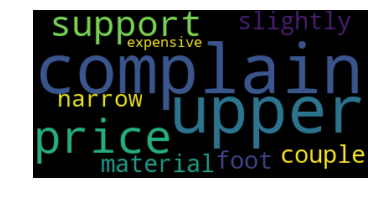

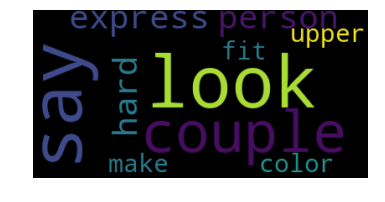

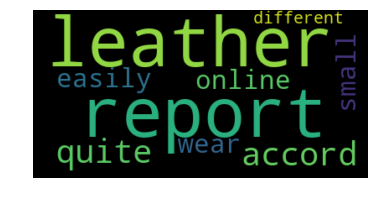

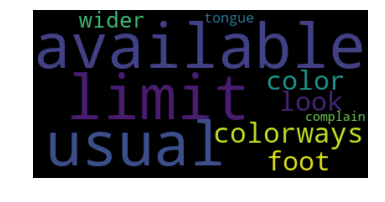

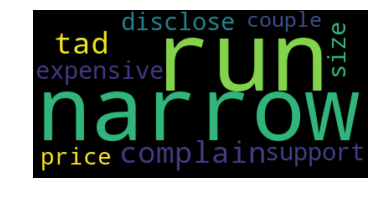

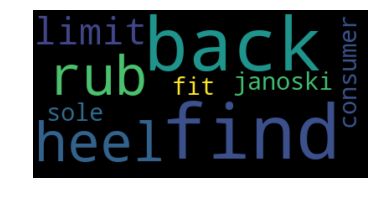

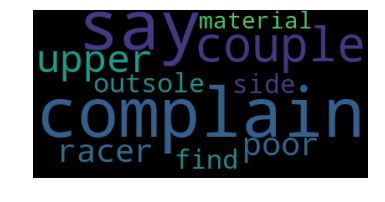

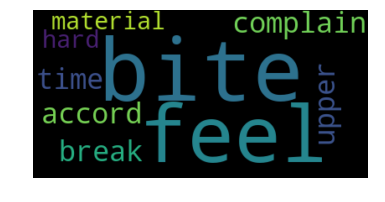

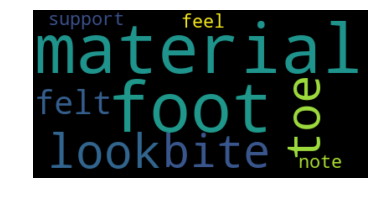

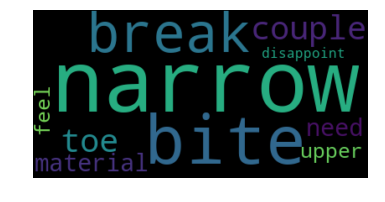

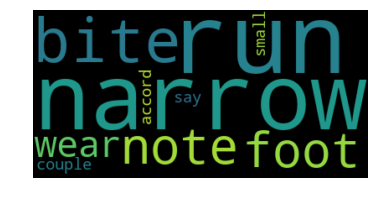

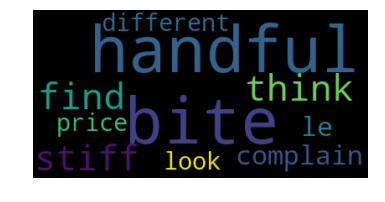

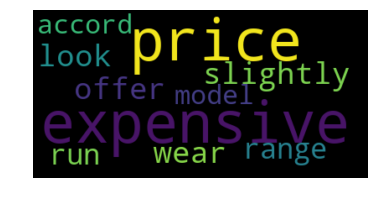

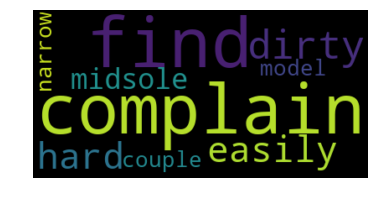

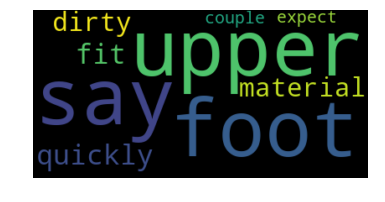

In [45]:
for i in range(15):
    wordcloud = WordCloud().generate(lda_c.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [46]:
lda_p = LdaMulticore(bow_corpus_p, id2word=dictionary_p, num_topics=15, random_state = 22, passes=10, per_word_topics=True)

In [47]:
lda_p.print_topics()

[(0,
  '0.014*"accord" + 0.012*"comfortable" + 0.012*"look" + 0.011*"excellent" + 0.011*"wear" + 0.010*"feel" + 0.010*"foot" + 0.010*"good" + 0.008*"low" + 0.008*"quality"'),
 (1,
  '0.015*"like" + 0.014*"good" + 0.011*"foot" + 0.010*"accord" + 0.010*"say" + 0.009*"love" + 0.009*"design" + 0.009*"upper" + 0.009*"wear" + 0.009*"comfortable"'),
 (2,
  '0.014*"accord" + 0.010*"wear" + 0.010*"like" + 0.009*"comfortable" + 0.008*"good" + 0.007*"couple" + 0.007*"fit" + 0.007*"style" + 0.007*"long" + 0.007*"get"'),
 (3,
  '0.019*"nmd" + 0.014*"wear" + 0.013*"primeknit" + 0.013*"upper" + 0.013*"design" + 0.012*"boost" + 0.011*"lot" + 0.011*"make" + 0.010*"feel" + 0.010*"material"'),
 (4,
  '0.020*"pharrell" + 0.018*"williams" + 0.016*"hu" + 0.015*"say" + 0.013*"foot" + 0.011*"offer" + 0.011*"look" + 0.010*"colorways" + 0.010*"design" + 0.010*"comfortable"'),
 (5,
  '0.011*"look" + 0.011*"foot" + 0.011*"good" + 0.011*"support" + 0.010*"model" + 0.009*"like" + 0.008*"accord" + 0.008*"material" +

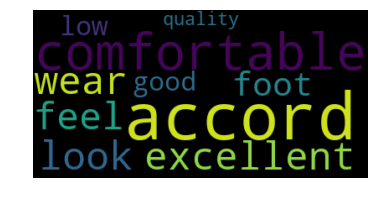

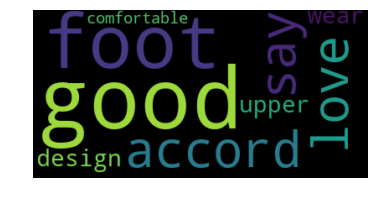

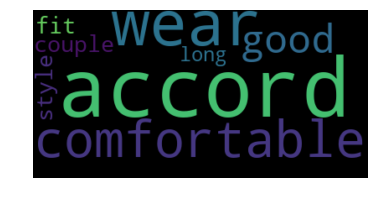

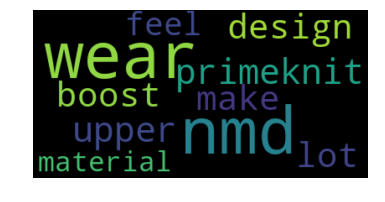

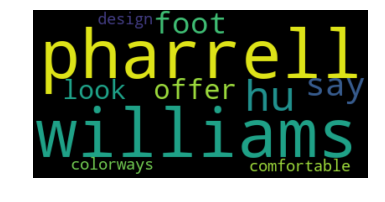

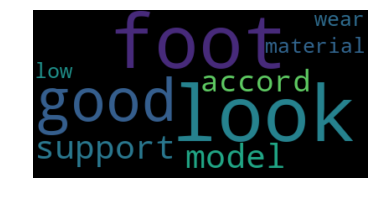

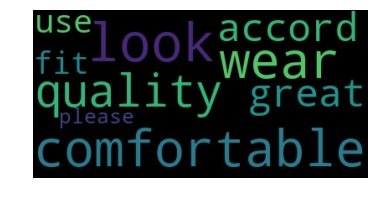

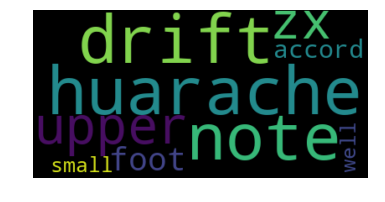

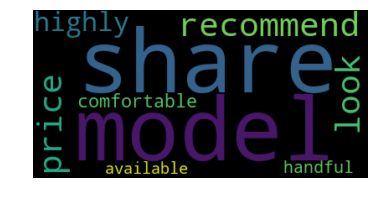

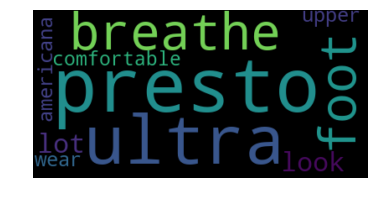

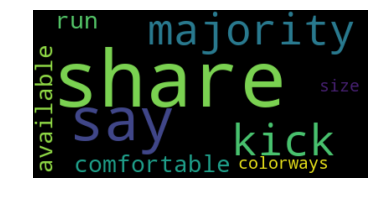

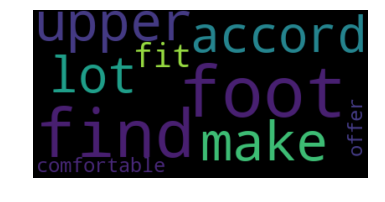

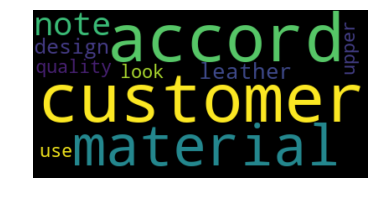

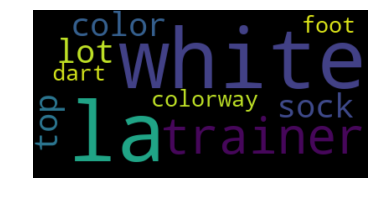

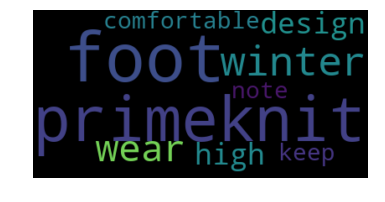

In [48]:
for i in range(15):
    wordcloud = WordCloud().generate(lda_p.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Vectorization

In [49]:
# List the top n words in a vocabulary according to occurrence in corpus

def get_top_n_words(corpus, ngram_start, ngram_end, n):
    cv = CountVectorizer(ngram_range = (ngram_start, ngram_end), min_df=25)
    bag_of_words = cv.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [50]:
def get_bottom_n_words(corpus, ngram_start, ngram_end, n):
    cv = CountVectorizer(ngram_range = (ngram_start, ngram_end), min_df=25)
    bag_of_words = cv.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1])
    return words_freq[:n]

In [51]:
# Given corpus, number of top words, the range of ngrams (just words: start = 1, end=1; words & bigrams: start=1, end=2), this function will graph the top words/ngrams in your corpus

def graph_top_n_ngrams(corpus, ngram_start, ngram_end, n):
    # Get top n words
    
    top_words = get_top_n_words(corpus, ngram_start, ngram_end, n)
    
    # Plot top n words
    
    fig = plt.figure(figsize=(10,5))
    ax = plt.barh([x[0] for x in top_words], [y[1] for y in top_words], 
            align='center', alpha=0.5)
    plt.title('Word Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Word')

In [52]:
cv = CountVectorizer(min_df=25)

## Bottom line

In [53]:
cv_bottom_line = [' '.join(sublist) for sublist in list_bottom_line]

In [54]:
bag_of_words_b = cv.fit_transform(cv_bottom_line)

In [55]:
df_b = pd.DataFrame(bag_of_words_b.toarray(), columns=cv.get_feature_names())

In [56]:
df_b

,activity,add,addition,adv,aesthetic,affordability,affordable,almost,also,although,...,weather,well,white,winter,without,worth,would,year,yet,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,2,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,2,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
get_top_n_words(cv_bottom_line, 1, 1, 10)

[('comfort', 491),
 ('look', 396),
 ('style', 357),
 ('price', 344),
 ('design', 315),
 ('upper', 301),
 ('also', 276),
 ('silhouette', 261),
 ('kick', 260),
 ('classic', 234)]

In [58]:
get_bottom_n_words(cv_bottom_line, 1, 1, 100)

[('aside', 25),
 ('comfy', 25),
 ('affordability', 25),
 ('apart', 25),
 ('variation', 25),
 ('flexibility', 25),
 ('try', 25),
 ('label', 26),
 ('way', 26),
 ('sport', 26),
 ('function', 26),
 ('positive', 26),
 ('mention', 27),
 ('never', 27),
 ('piece', 27),
 ('last', 27),
 ('pair', 27),
 ('minimal', 27),
 ('showcase', 27),
 ('around', 27),
 ('activity', 27),
 ('revamp', 27),
 ('insole', 27),
 ('maintain', 28),
 ('name', 28),
 ('anyone', 28),
 ('turn', 28),
 ('must', 28),
 ('collaboration', 28),
 ('ideal', 28),
 ('since', 29),
 ('trendy', 29),
 ('review', 29),
 ('best', 29),
 ('trainer', 29),
 ('enthusiast', 29),
 ('nike', 29),
 ('vibe', 30),
 ('side', 30),
 ('supportive', 30),
 ('lightness', 30),
 ('traction', 30),
 ('slightly', 31),
 ('heritage', 31),
 ('introduce', 31),
 ('moreover', 31),
 ('minor', 31),
 ('tech', 31),
 ('contemporary', 31),
 ('bite', 31),
 ('se', 31),
 ('launch', 32),
 ('school', 32),
 ('available', 32),
 ('series', 32),
 ('though', 33),
 ('might', 33),
 ('tongu

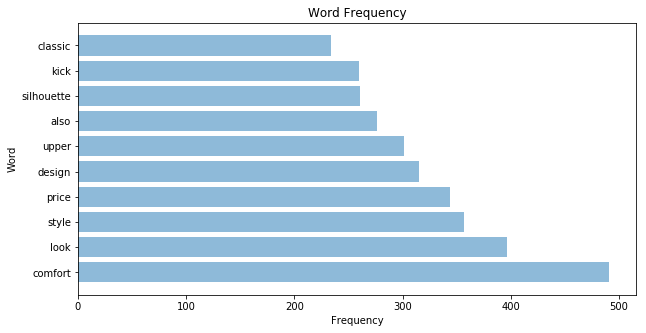

In [59]:
graph_top_n_ngrams(cv_bottom_line, 1, 1, 10)

## Con text

In [60]:
cv_con_text = [' '.join(sublist) for sublist in list_con_text]

In [61]:
bag_of_words_c = cv.fit_transform(cv_con_text)

In [62]:
df_c = pd.DataFrame(bag_of_words_c.toarray(), columns=cv.get_feature_names())

In [63]:
df_c

,accord,ankle,another,arch,area,available,back,better,big,bite,...,upper,use,usual,version,wear,white,wide,width,wish,would
0,2,1,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,1,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [64]:
get_top_n_words(cv_con_text, 1, 1, 10)

[('complain', 233),
 ('narrow', 209),
 ('couple', 193),
 ('bite', 186),
 ('say', 168),
 ('run', 167),
 ('upper', 154),
 ('foot', 150),
 ('find', 145),
 ('get', 136)]

In [65]:
get_bottom_n_words(cv_con_text, 1, 1, 100)

[('especially', 25),
 ('different', 25),
 ('durability', 26),
 ('rubber', 27),
 ('option', 27),
 ('sock', 27),
 ('mid', 28),
 ('le', 28),
 ('observe', 29),
 ('much', 29),
 ('fan', 29),
 ('person', 29),
 ('difficult', 29),
 ('back', 29),
 ('offer', 29),
 ('least', 30),
 ('width', 30),
 ('big', 31),
 ('wish', 31),
 ('day', 31),
 ('expect', 31),
 ('premium', 31),
 ('part', 32),
 ('version', 32),
 ('usual', 32),
 ('poor', 32),
 ('take', 32),
 ('midsole', 32),
 ('quality', 33),
 ('white', 33),
 ('state', 33),
 ('cause', 33),
 ('ankle', 34),
 ('another', 34),
 ('original', 34),
 ('period', 34),
 ('enough', 35),
 ('boost', 35),
 ('uncomfortable', 35),
 ('side', 36),
 ('rub', 36),
 ('two', 36),
 ('commenters', 37),
 ('heavy', 38),
 ('review', 38),
 ('put', 38),
 ('kick', 38),
 ('critic', 38),
 ('grip', 38),
 ('suede', 39),
 ('clean', 40),
 ('colorway', 40),
 ('design', 41),
 ('thin', 41),
 ('outsole', 42),
 ('tend', 42),
 ('shoe', 42),
 ('box', 42),
 ('better', 43),
 ('online', 43),
 ('top', 4

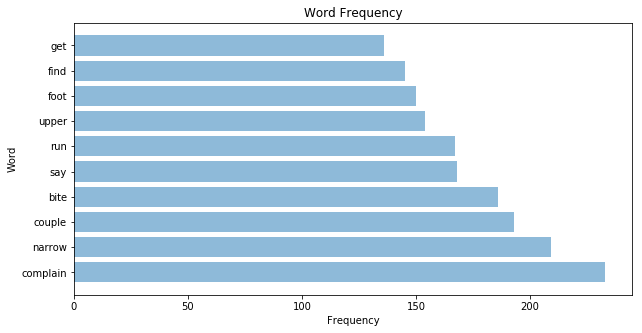

In [66]:
graph_top_n_ngrams(cv_con_text, 1, 1, 10)

## Pro text

In [67]:
cv_pro_text = [' '.join(sublist) for sublist in list_pro_text]

In [68]:
bag_of_words_p = cv.fit_transform(cv_pro_text)

In [69]:
df_p = pd.DataFrame(bag_of_words_p.toarray(), columns=cv.get_feature_names())

In [70]:
df_p

,accent,accord,activity,actual,add,addition,adequate,admire,adore,adv,...,wide,winter,without,word,work,worth,would,year,yet,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
get_top_n_words(cv_pro_text, 1, 1, 10)

[('like', 659),
 ('comfortable', 619),
 ('look', 604),
 ('wear', 563),
 ('accord', 483),
 ('foot', 472),
 ('design', 452),
 ('good', 444),
 ('say', 418),
 ('material', 400)]

In [72]:
get_bottom_n_words(cv_pro_text, 1, 1, 100)

[('solid', 25),
 ('accent', 25),
 ('photo', 26),
 ('touch', 26),
 ('surprise', 26),
 ('period', 26),
 ('short', 26),
 ('suit', 26),
 ('improve', 26),
 ('vibrant', 26),
 ('superior', 26),
 ('declare', 27),
 ('generally', 27),
 ('first', 27),
 ('finish', 27),
 ('sporty', 27),
 ('area', 27),
 ('protection', 27),
 ('anything', 27),
 ('fashion', 28),
 ('shoes', 28),
 ('chunky', 28),
 ('right', 28),
 ('deem', 28),
 ('adequate', 28),
 ('nearly', 28),
 ('head', 28),
 ('activity', 29),
 ('logo', 29),
 ('addition', 29),
 ('try', 29),
 ('hour', 29),
 ('pattern', 30),
 ('snug', 30),
 ('reasonably', 30),
 ('craftsmanship', 30),
 ('month', 30),
 ('level', 31),
 ('incredibly', 31),
 ('amaze', 31),
 ('vibe', 31),
 ('gym', 31),
 ('sell', 31),
 ('include', 31),
 ('impact', 31),
 ('stripe', 32),
 ('bring', 32),
 ('fashionable', 32),
 ('peer', 32),
 ('enhance', 32),
 ('per', 33),
 ('perfectly', 33),
 ('timeless', 33),
 ('help', 33),
 ('laud', 33),
 ('technology', 34),
 ('remain', 34),
 ('profile', 34),
 (

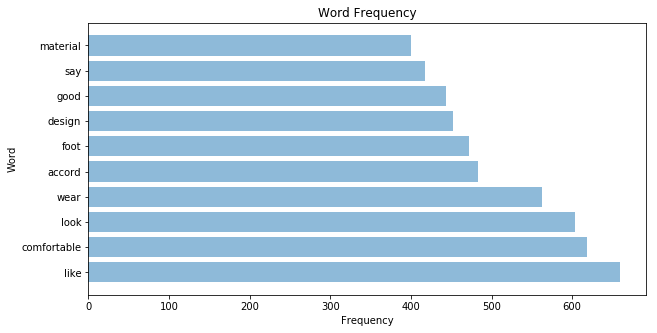

In [73]:
graph_top_n_ngrams(cv_pro_text, 1, 1, 10)

# Modeling

## Bottom line

In [74]:
X_b = np.array(df_b)

In [75]:
neighbor_b = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

In [76]:
neighbor_b.fit(X_b)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [77]:
b = neighbor_b.kneighbors(n_neighbors= 5, return_distance=False)

## Con text

In [78]:
X_c = np.array(df_c)

In [79]:
neighbor_c = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

In [80]:
neighbor_c.fit(X_c)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [81]:
c = neighbor_c.kneighbors(n_neighbors= 5, return_distance=False)

## Pro text

In [82]:
X_p = np.array(df_p)

In [83]:
neighbor_p = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='cosine')

In [84]:
neighbor_p.fit(X_p)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [85]:
p = neighbor_p.kneighbors(n_neighbors= 5, return_distance=False)

In [86]:
def get_neighbors(sneaker):
    sneaker = difflib.get_close_matches(sneaker, df_name_score.name.tolist())[0]
    i = df_name_score[df_name_score['name'] == f'{sneaker}'].index[0]
    b1 = b[i][0]
    n_b1 = df_name_score.iloc[b1]['name']
    r = 0
    c1 = c[i][0]
    while c1 == b1:
        r += 1
        c1 = c[i][r]
    n_c1 = df_name_score.iloc[c1]['name']
    p1 = p[i][0]
    while p1 == c1:
        r += 1
        p1 = p[i][r]
    n_p1 = df_name_score.iloc[p1]['name']
    chrome_path = 'open -a /Applications/Google\ Chrome.app %s'
    shoes = [sneaker, n_b1, n_p1, n_c1]
    for s in shoes:
        s = s.lower()
        s = s.replace(' ', '-')
        s = s.replace('_', '-')
        s = s.replace('.', '')
        s = s.replace('/', '')
        url = f'https://runrepeat.com/{s}'
        webbrowser.get(chrome_path).open(url, new=2)
        time.sleep(5)

In [87]:
df_name_score

,name,score
0,Pharrell Williams x Adidas Human Race NMD,93
1,Adidas Stan Smith,93
2,Adidas Continental 80,92
3,Adidas POD-S3.1,92
4,Adidas Superstar,94
5,Adidas Grand Court,92
6,Adidas I-5923,91
7,Adidas Sobakov,92
8,Adidas Swift Run,93
9,Adidas NMD_R1 Primeknit,92


In [88]:
# get_neighbors(input())